##### structured Exploratory Data Analysis of:
- explore the dataset’s variables
- understand the data’s structure, oddities, patterns and relationships.
- ask questions of the data and make your own discoveries.

- main findings from your exploration

- construct a story for your readers to understand what you found.

# Apple, Microsoft, Google, Amazon, Facebook, and Netflix
# Employees' Workplace Reviews.
___

**Context:** Over 67k employee reviews for Google, Amazon, Facebook, Apple, and Microsoft.

**Acknowledgements:** This data was scraped from Glassdoor.

**Questions**
- What company has been improving best?
- based on this data what company seems the best choice for a specific postion?
- is there a relationship base on stock market mometoum and volatility and employee's workplace rating?
- What pros each company is best at?
- what positions seem to be happiest in each company? (and overall)

- a company cultur is like a living thing, it grows, changes, fades away, It's the direction that matters most for current and potential employees perhaps more than where they are now. So recent reviews so weigh more of general status of a cimpany.


- what proportion of employees felt comfortable enough not tobe Anonymous?
___

Scratch Notes

- Exploratory Data Analysis and Visualization for Text Data
- Create a stunning visualization
- focus of the project is on exploratory data analysis
- worthy of posting it to Medium, Kaggle
- Emplopyers and My Tech Friends value it

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

https://www.kaggle.com/aashita/exploratory-data-analysis-of-comments-on-nyt

https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews

Table of contents:
1. [Importing modules and loading data ](#import)

___

## Importing modules and loading data <a name="import"></a>

#### First we import python modules and setting notebook environment

In [1]:
# Essential Data Analysis Ecosystem Libraries
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Python Standard Libraries
import os  # os file operations
import re  # data cleaning
import webbrowser
from collections import Counter

# 
import textblob

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set plots to be embedded inline
%matplotlib inline

# base color
bcolor = sns.color_palette()[0]
two_in_row = (12, 6)  # two square plots next to each other
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

#### Load up our dataset to a DataFrame

In [2]:
# dataset starting file(s)
dataset_path = 'input/'
print ('Dataset file(s):', os.listdir(dataset_path))

# TODO: If there is a new version of the dataset, programmatically download updated dataset zip file from Kaggle.
# ToDO

df_raw = pd.read_csv(os.path.join(dataset_path, 'employee_reviews.csv'))

Dataset file(s): ['Untitled.ipynb', 'employee_reviews.csv', '.ipynb_checkpoints']


end of Importing modules and loading data
___

## First look at the data:<a name="import"></a>

#### Let's look at shape of our raw data and  5  random  reviews:

In [3]:
print('Number of rows (reviews) and columns:', df_raw.shape)
df_raw_samples = df_raw.sample(5)
df_raw_samples

Number of rows (reviews) and columns: (67529, 17)


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
22088,22089,amazon,"Toms River, NJ","May 27, 2015",Current Employee - Packer,Packer,"Pros are few but I think management has ""likab...",Warehouses are isolated from the communities i...,"Reassess goals. Do you want happy, get-along w...",2.0,1.0,1.0,1.0,3.0,1.0,3,https://www.glassdoor.com/Reviews/Amazon-Revie...
9894,9895,amazon,"Seattle, WA","Jun 21, 2018",Current Employee - Program Manager,Amazon - Best Company to Start Your Career,"Independence, you learn how to deal with ambig...",Managers are solely hired based on IC performa...,none,4.0,3.0,4.0,5.0,4.0,4.0,2,https://www.glassdoor.com/Reviews/Amazon-Revie...
17310,17311,amazon,"Joliet, IL","Dec 11, 2016",Current Employee - Process Guide,Process Guide,Working with other people who came from around...,Some associates don't contribute,More hands on interaction with the associates,5.0,5.0,5.0,5.0,5.0,5.0,1,https://www.glassdoor.com/Reviews/Amazon-Revie...
35328,35329,facebook,"Menlo Park, CA","Nov 13, 2012",Current Employee - Software Engineer,"Talent, commitment, autonomy, impact.",The most important reason to work at Facebook ...,A mission-oriented job is not for everybody. I...,none,5.0,3.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Facebook-Rev...
13236,13237,amazon,"Seattle, WA","Dec 4, 2017",Current Employee - Senior Program Manager,Don’t do it!,Compensation if you stay for 4 years. Amazon n...,Too many to list. My advice to you is to decli...,The corporate culture is toxic. Fix it before ...,1.0,1.0,1.0,1.0,3.0,1.0,1,https://www.glassdoor.com/Reviews/Amazon-Revie...


- `index` and `Unnamed: 0` column seem as an id and are redundant.
- 'none' is used for missing values.
- Tidiness issue: Global location column contains 3 different 'city, state, and country' values. This column is to be separated in 3 columns.
- Tidiness issue: employee_status (current or former) and job_title are to be seperated in two columns.

#### Information about the columns' names, datatypes, unique values, and null values:

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

We don't see lots of missing data but that's most likely because missing data represented by string 'non'

In [5]:
df_raw.nunique()

Unnamed: 0                    67529
company                           6
location                       2044
dates                          3824
job-title                      8308
summary                       42649
pros                          66085
cons                          66049
advice-to-mgmt                35190
overall-ratings                   5
work-balance-stars               10
culture-values-stars              6
carrer-opportunities-stars       10
comp-benefit-stars               10
senior-mangemnet-stars           10
helpful-count                    99
link                           6754
dtype: int64

We have four specific categories of ratings and 1 overall rating. They should be based on a 1-star to 5-stars ratings, but there are up to 10 different vlues for those ratings that needs to be looked at and cleaned.

#### We can follow our sample scrapped reviews to www.glassdoor.com to see the actual reviews.

In [6]:
links = df_raw_samples['link']
print(links)
answer = input('Enter,  y  if you would like to open and see these sample reviews\` urls? ')
if answer.lower()=='y':
    [webbrowser.open(link) for link in links]

22088    https://www.glassdoor.com/Reviews/Amazon-Revie...
9894     https://www.glassdoor.com/Reviews/Amazon-Revie...
17310    https://www.glassdoor.com/Reviews/Amazon-Revie...
35328    https://www.glassdoor.com/Reviews/Facebook-Rev...
13236    https://www.glassdoor.com/Reviews/Amazon-Revie...
Name: link, dtype: object
Enter,  y  if you would like to open and see these sample reviews\` urls? 


Looking at the actual source of the data, we can see  two very likely useful peices of information in reviews are not scrapped. That is the length and type of employments. Here is 3 examples:
 - I worked at Amazon full-time (More than 3 years)
 - I have been working at Microsoft full-time (More than 10 years)
 - I have been working at Google full-time (Less than a year)

#### Copanies Review Shares in Raw Dataset
To add meaning to the order of chart we will be plotting involving companies, let's convert company column to categorical data sorted by date founded.

In [7]:
company_cat = CategoricalDtype(ordered=True, 
                               categories=['microsoft', 'apple', 'amazon', 'netflix', 'google', 'facebook'])
df_raw['company'] = df_raw['company'].astype(company_cat)

In [8]:
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

In [9]:
def plot_cat_counts(data, x):
    plt.figure(figsize=two_in_row)

    # plt.style.use('ggplot')

    plt.subplot(1,2,1)
    sns.countplot(data=data, y=x, color=bcolor)
    plt.xticks(rotation=0)
    plt.ylabel('')
#     plt.xlabel('Review Counts')
    sns.despine() # remove the top and right borders


    plt.subplot(1,2,2)
    sorted_counts = data[x].value_counts()
    labels = sorted_counts.index

    plt.pie(sorted_counts, labels=labels, 
            startangle=90, counterclock=False, wedgeprops = {'width' : 0.35})
    plt.axis('square')
    
    plt.show

    # plt.legend(labels,
    #           title="Companies in Raw Dataset",
    #           loc="top left",
    #           bbox_to_anchor=(1, 0, .25, 1));

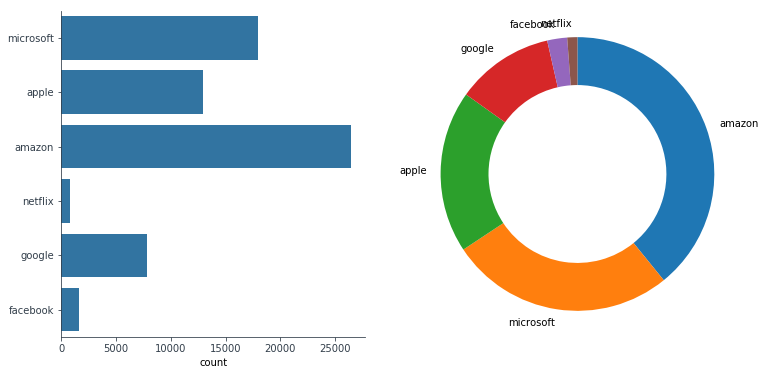

In [10]:
plot_cat_counts(df_raw, 'company')

end of quick look
___

## Data Cleaning

#### Tidiness: There are 3 values of  `city, state, country` in location column. We will make this tidy by separating each value in its own column.

In [11]:
# location column before cleaning
df = df_raw
df['location'].sample(10)

22183             El Paso, TX
25486    London, England (UK)
8124                     none
36229                    none
7660        Bengaluru (India)
17322                    none
43073             Phoenix, AZ
59176             Redmond, WA
54582             Redmond, WA
48747    London, England (UK)
Name: location, dtype: object

#### functions to extrat "city, state, and country" values from location column to 3 columns

In [12]:
btween_parentheses = r'\(([^)]+)\)'  # Regular expression to get a string between parentheses


def get_country(location):
    """Extracts and returns country name from location string.
    Returns NaN if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        return not_usa[0]
    else:
        return 'USA'
    

def get_state(location):
    """Extracts and returns state name (if aby) from location string.
    Returns Nan if 'none or not applicable."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[1].split()[0]
        else:
            return np.nan
    else:
        return location.strip()[-2:]

    
def get_city(location):
    """Extracts and returns city name from location string.
    Returns Nan if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[0]
        else:
            return location.split()[0]
    else:
        return location.split(',')[0]    

In [13]:
df['city'] = df.location.apply(get_city)
df['state'] = df.location.apply(get_state)
df['country'] = df.location.apply(get_country)

In [14]:
# Test
df[['city', 'state', 'country']].sample(5)

,city,state,country
18248,NaN,NaN,NaN
54837,Seattle,WA,USA
4233,Santa Monica,CA,USA
2055,Mountain View,CA,USA
53675,Redmond,WA,USA


#### Renaming Columns for Clarity/Consistency

- We rename all 5 rating columns to start with `r_`.
- All columns\` names to singular nouns.
- Change connecting dashs `-` to underscores `_`.

In [15]:
df.rename(columns={'dates': 'date',
                   'advice-to-mgmt': 'advice_to_mgmt',
                   'overall-ratings': 'r_overall',
                   'work-balance-stars': 'r_work_balance',
                   'culture-values-stars': 'r_culture',
                   'carrer-opportunities-stars': 'r_career_opp',
                   'comp-benefit-stars': 'r_comp_benefit',
                   'senior-mangemnet-stars': 'r_senior_mangemnet',
                   'helpful-count': 'helpful_count'}, inplace=True);

###  Tidiness: Seperate `job-title` column values to 2 columns, current_emp and job_title.

In [16]:
df['current_emp'] = df['job-title'].apply(lambda column: True if column.split()[0] == 'Current' else False)
df['job_title'] = df['job-title'].apply(lambda column: column.split('-')[1])

### Tidiness: Anonymous  Employees (Reviewers) are mix with Job-Titles
- Make a True/False Column for Anonymous Employees
- Replace Anonymous Employee with NaN in job_title coloumn

In [17]:
df['job_title'].value_counts()[:10]

 Anonymous Employee                  27002
 Software Engineer                    1793
 Software Development Engineer        1270
 Specialist                           1060
 Program Manager                       826
 Warehouse Associate                   679
 Senior Software Engineer              637
 Senior Program Manager                608
 Fulfillment Associate                 603
 Software Development Engineer II      586
Name: job_title, dtype: int64

In [18]:
df['anonymous'] = df['job_title'].apply(lambda job: True if 'Anonymous' in str(job) else False)

In [19]:
df['job_title'] = df['job_title'].apply(lambda job: np.nan if 'Anonymous' in str(job) else job)

In [20]:
#Test
df[['job_title', 'anonymous']].sample(5)

,job_title,anonymous
18697,NaN,True
17674,Fulfillment Associate,False
62608,Channel Executive,False
1314,NaN,True
29228,Software Development Engineer,False


### Data Cleaning: Dropping redundant columns

In [21]:
drop_columns = ['Unnamed: 0', 'location', 'job-title', 'link']
df.drop(columns=drop_columns, axis=1, inplace=True)

### Data Cleaning: Types and Value Corrections

In [22]:
# Replace misrepresentations of missing values to NaN
df.replace('none', np.nan, inplace=True);

In [23]:
# Datetime Types:
df.date = pd.to_datetime(df.date, errors='coerce')

In [24]:
# Let's look as the length of of time series
df['date'].min(), df['date'].max()

(Timestamp('2008-01-31 00:00:00'), Timestamp('2018-12-11 00:00:00'))

Let's sort the df by `data` column that is the only time series.

In [25]:
df.sort_values(by='date', ascending=False, inplace=True)

The rating is based on a popular scale from 1 the worst to 5 the best. Some rating values in rating columns are in between levels i.e. 1.5, 2.5, 3.5, or 4.5. We will correct these rating by lowering them one level. E.g. 1.5 to 1, 2.5 to 2. Note There is no 0.5 nor 5.5 ratings to be corrected.

In [26]:
rating_cols = [col for col in df.columns if col.startswith('r_')]

In [27]:
# Rating values to Numeric
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')

In [28]:
# Correct in between rating values to lower rating before
def five_ratings_only(col):
    for idx in col.value_counts().index:
        col[col==idx] = int(float(idx))
    return col

for col in rating_cols:
    df[col] = five_ratings_only(df[col])

In [29]:
# Test
df[rating_cols].sample(5)

,r_overall,r_work_balance,r_culture,r_career_opp,r_comp_benefit,r_senior_mangemnet
64044,3,2.0,1.0,2.0,3.0,1.0
22733,2,1.0,2.0,4.0,4.0,2.0
47589,5,5.0,5.0,5.0,5.0,5.0
50421,5,4.0,5.0,4.0,4.0,4.0
26886,5,NaN,NaN,NaN,NaN,NaN


### Data Cleaning: Missing Values
 - Cleaning Missing Values
 - Plotting Missing Values' Counts

In [30]:
def plot_missings(df, figsize=two_in_row):
    
    fig, ax = plt.subplots(figsize=figsize)
    color = sns.color_palette()[3]
    
    x = df.isnull().sum().index.values
    y = df.isnull().sum()
    sns.barplot(x, y, color=color, ax=ax)
    locs, labels = plt.xticks(rotation=90)
    for loc, label, missings, in zip(locs, labels, y):
        if not missings:
            ax.text(loc, 0, 'None', rotation=0, va='bottom', ha='center')
        else:
            ax.text(loc, missings, missings, rotation=0, va='bottom', ha='center')

    ax.set(title='Missing Value Counts in all Columns', xlabel='Columns', ylabel='Counts')
    sns.despine() # remove the top and right borders

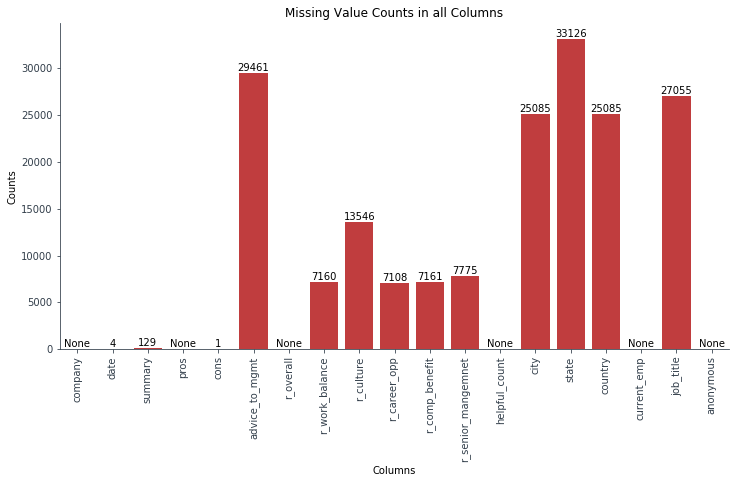

In [31]:
plot_missings(df)

- Fortunatly we have no missing values in overall-rating.
- After reviewing some of the reviews with missing values, in the mean time it doesn't seem we should drop any review. 

In [32]:
#looking at one review with missing `cons` comment.
df[df.cons.isnull()]

,company,date,summary,pros,cons,advice_to_mgmt,r_overall,r_work_balance,r_culture,r_career_opp,r_comp_benefit,r_senior_mangemnet,helpful_count,city,state,country,current_emp,job_title,anonymous
42755,apple,2015-07-27,a great place,everything is awesome!!,NaN,NaN,4,5.0,5.0,5.0,5.0,5.0,0,Charlotte,NC,USA,True,NaN,True


end of cleaning data
___

## Univariate Explorations

#### Yearly number of reviews distribution

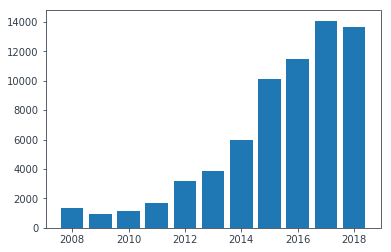

In [33]:
yearly = df.groupby(df['date'].dt.year).size()
positions = yearly.index
plt.bar(positions, yearly.values);

In [34]:
yearly.sort_values(ascending=False).cumsum()/yearly.sum()

date
2017.0    0.208441
2018.0    0.410974
2016.0    0.581133
2015.0    0.731300
2014.0    0.819282
2013.0    0.876431
2012.0    0.923969
2011.0    0.949293
2008.0    0.969508
2010.0    0.986242
2009.0    1.000000
dtype: float64

- The majority of reviews, more than 73%, in out dataset are fairly recent within the last 4 years.

We will first look at the overall reviews rating distributions with an eye on differences between current and past employees.

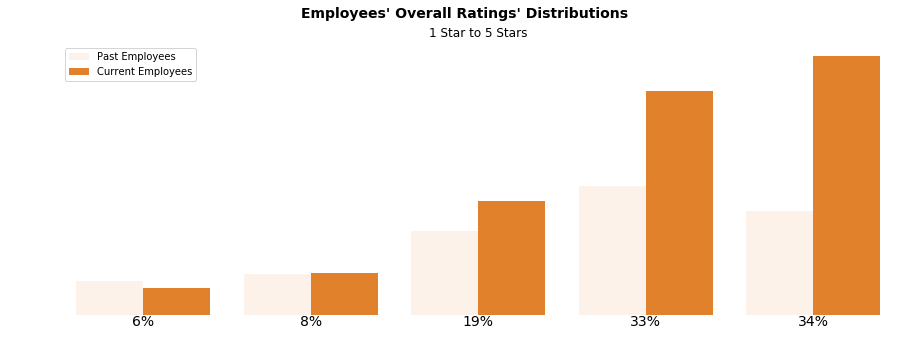

In [35]:
# Create the figure and axes and get access to them
fig, ax = plt.subplots(figsize=(15, 5))

# Figure's Title
fig.suptitle('Employees\' Overall Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[1]

x = 'r_overall'
hue = 'current_emp'
sns.countplot(ax=ax, data=df, x=x, hue=hue, color=color)

ax.set(title='1 Star to 5 Stars')
ax.legend(['Past Employees', 'Current Employees'])
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df.r_overall.value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):

    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

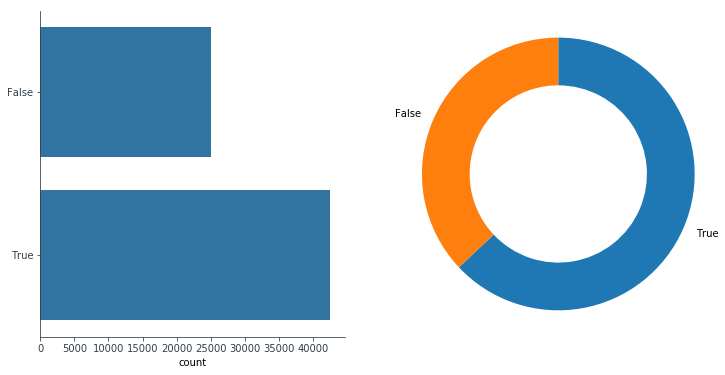

In [36]:
plot_cat_counts(df, 'current_emp')

In [37]:
#TODO: Create two side by side donut plots with 3 wedges depicting 
# overal ratings of past & current employees in 3 Categorical groups
# Happy Employees consisting of 4 and 5 star reviews
# Neutral Employees consisting of only 3 starreviews
# Unhappy Employees consisting of 1 and 2 reviews

**Observation:** 
 - This plot shows unhappy past employees were more inclined to leave a low review than current employees.
 - We can see the current/past ratio increases as rating stars increeases. 
 - Happier current employees are leaving higher rating reviews maybe to show their appreciation.
 - Uphappier past employees are leaving lower rating reviews maybe to be heard!
 ___

#### Distributions of Reviews over time
#### Calculate Review Age Multiplier
#### New Col - Rating * TimeMultiplier

In [38]:
###
# Visualize number of reviews over each month in our dataset
# Visualize average of a rating over each year
dt = df['date'].values
# type(dt.values)
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

df.groupby('year').size()
d = df[df['year']>=2014]

____

### Side by Side Distribution of All Ratings Groups

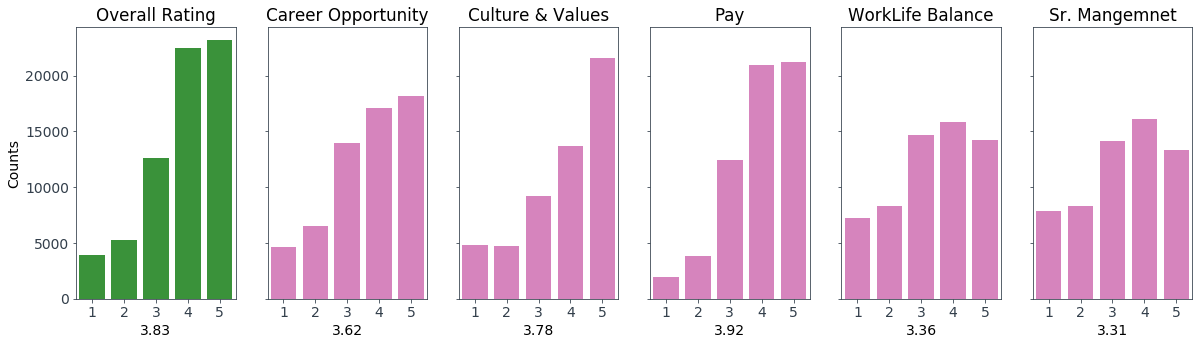

In [41]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5))

# fig.suptitle('Distribution of all 5 Employees\' Ratings Groups', fontsize=22, fontweight='bold')

plt.rcParams.update({'font.size': 14})

color = sns.color_palette()[2]
xticks=[1, 2, 3, 4, 5]

sns.countplot(ax=ax0, data=df, x=df['r_overall'], color=color, order=xticks)

color = sns.color_palette()[6]
sns.countplot(ax=ax1, data=df, x=df['r_career_opp'], color=color, order=xticks)
sns.countplot(ax=ax2, data=df, x=df['r_culture'], color=color, order=xticks)
sns.countplot(ax=ax3, data=df, x=df['r_comp_benefit'], color=color, order=xticks)
sns.countplot(ax=ax4, data=df, x=df['r_work_balance'], color=color, order=xticks)
sns.countplot(ax=ax5, data=df, x=df['r_senior_mangemnet'], color=color, order=xticks)

mean = '{:0.2f}'.format(df['r_overall'].mean())
ax0.set(title='Overall Rating', xlabel=mean, ylabel='Counts')

mean = '{:0.2f}'.format(df['r_career_opp'].mean())
ax1.set(title='Career Opportunity', xlabel=mean, ylabel='')

mean = '{:0.2f}'.format(df['r_culture'].mean())
ax2.set(title='Culture & Values', xlabel=mean, ylabel='')

mean = '{:0.2f}'.format(df['r_comp_benefit'].mean())
ax3.set(title='Pay', xlabel=mean, ylabel='')

mean = '{:0.2f}'.format(df['r_work_balance'].mean())
ax4.set(title='WorkLife Balance', xlabel=mean, ylabel='')

mean = '{:0.2f}'.format(df['r_senior_mangemnet'].mean())
ax5.set(title='Sr. Mangemnet', xlabel=mean, ylabel='');

# TODO: Print percentage of each bar on each bar on it.

**Findings Here:**
- The average (mean) ratings for each category (of rating) are very close. (with a sd of 0.11) 
- Overall Rating seems to best follow employees hapiness (rating) with Compensation and Benefits. 
- Can we say Work Life Balance chart shows employees favor less time at work!?
___

### Helpful_Count Column Distribution

This is the only numeric feature that comes with our dataset. Let's take a look at it's distribution

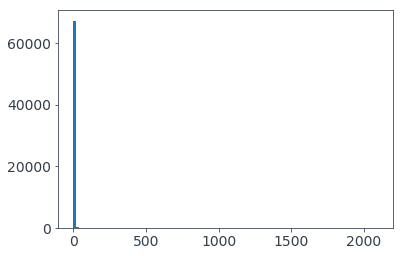

In [42]:
# plt.figure(figsize=(7.5, 5))
plt.hist(data=df, x='helpful_count', bins=100);

Our first histogram shows exterem Outliers exist.

In [43]:
def hist_magnifier(df, x, xlim1, xlim2, binsize):
    plt.hist(data=df, x=x, bins=np.arange(xlim1, xlim2+binsize, binsize))
    plt.xlim(xlim1, xlim2);

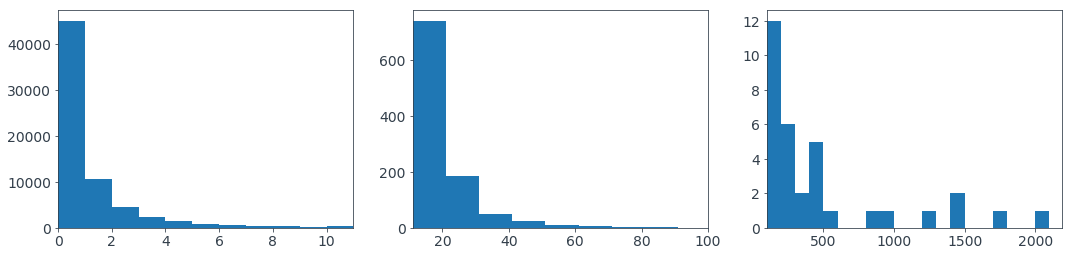

In [44]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
hist_magnifier(df, df['helpful_count'], 0, 11, 1)

plt.subplot(1, 3, 2)
hist_magnifier(df, df['helpful_count'], 11, 100, 10)

plt.subplot(1, 3, 3)
hist_magnifier(df, df['helpful_count'], 100, df['helpful_count'].max()+100, 100)

In [45]:
cum_hist = df['helpful_count'].value_counts(normalize=True).cumsum()
cum_hist[cum_hist<0.95]

0    0.666588
1    0.822254
2    0.888389
3    0.923514
4    0.944068
Name: helpful_count, dtype: float64

After some trial and error we arrived with these 3 histograms. Please pay attention to count for each plot and x data range.
- Two third of all reviews have no helpful_count
- 95% of reviews have helpful_count of 4 or less
- From 10 to about 40 helpful_counts number reviews are in hundreds.
- Any helpful_count of 50 or more to the highest count of about low two thousand are far in between.

end of Univariate Explorations
____

## Bivariate Explorations

In [66]:
def ratings_trend(df=df, rating_cols=rating_cols):
    plt.figure(figsize=(10, 15))

    colors = ['', 'grey', 'blue', 'green', 'red', 'brown']
    ypos = 4.25
    for rating_col, color in zip(rating_cols, colors):
        if rating_col != 'r_overall':
            sns.pointplot(data=df, x='r_overall', y=rating_col, color=color)
            plt.text(0.5, ypos, str(rating_col), color=color)
            ypos += 0.15

    plt.ylim(1, 5)
    plt.grid()
    plt.xlabel('Overall Companys\` Rating')
    plt.ylabel('Average rating of each sub-category rating vs. for each 5 ratings of overall-rating');

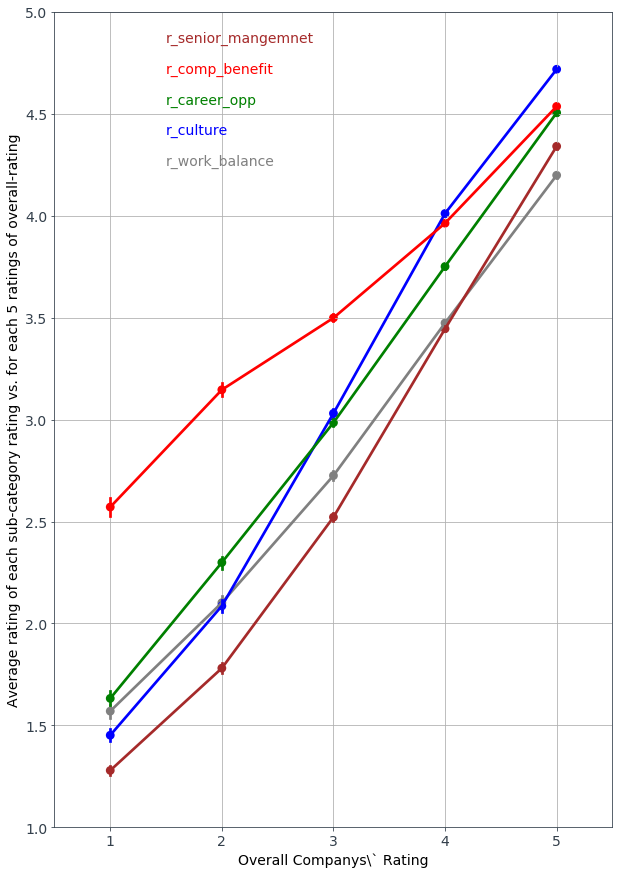

In [67]:
ratings_trend(df)

- Employees given overall 4 or 5 Stars also on average given highest ratings to culture and values.
- - Happiest were most happy of culture ot they thoughtthet did!
- Unhappiest employees, those given overall 1 or 2 Stars rating, were most uphappy with Culture and Values of the company and least unhappy about thier pay.
- 

end of bivariate explorations
___

## Feature Engineering

Create new feature for the length of the review.
Create new feature for the word count of the review.

In [48]:
# Clean Review Text Columns
text_cols = ['summary', 'pros', 'cons', 'advice_to_mgmt']

df['comments_wordcount'] = 0
for col in text_cols:
    df['comments_wordcount'] += df[col].astype(str).apply(lambda text: len(text.split()))

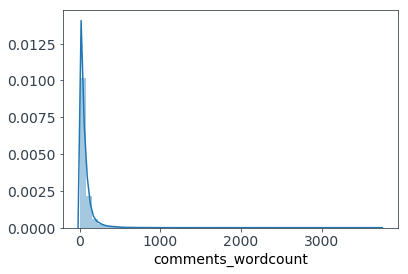

In [49]:
sns.distplot(df['comments_wordcount']);

In [50]:
df['comments_wordcount'].describe()

count    67529.000000
mean        69.608405
std         90.158068
min          8.000000
25%         23.000000
50%         42.000000
75%         82.000000
max       3726.000000
Name: comments_wordcount, dtype: float64

In [51]:
df['review_age_int'] = pd.to_numeric((pd.datetime.today() - df['date']).dt.days)

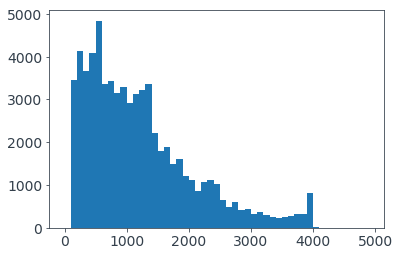

In [52]:
# sns.distplot(df['review_age_int'], n)
plt.hist(data=df, x=df['review_age_int'], bins=np.arange(0, 5000, 100));

In [ ]:
df.sample()

### Time Factor
Companies like other living things are constantly evolving, experiemnting, learning from thier mistakes, and changing. Time of each review is an snapshot of a company from the perspective of someone who is part of this living whole. A review or general take of an employee is shaped by his/her experiances, currenr and past expectations, thier own personal values  and future hopes both for themselves and the comapny.

Therefore a recen review last month must have a much higher weight than a review 5 years ago. To take this into consideration we define a new feature `timefactor` that is from (0 to 1). 1 for a review left today and 0 zero for a review left 5 years (1825 days) or beyond.

This is a linear weight system we choose to use; Perhaps it is not  the most optimal but we it should be practical enough for our dataset.

### Reviewer Care Factor
This might sound a bit odd but someone leaving a detailed review summary, pros and cons points and advise for management with about 1000 words deserve more weight (attention) than a partial quick review with 20 words. To measure this we make a new feature `carefactor` based on the overall length of the different part s of the review. 

### Review Score
- Helpful Count
- Overall Rating
- - This column has no missing values in our dataset and also based on the practical close means and very small sd of all categories of ratings, it makes the best rating for making our review score
- Time Factor


In [ ]:
5*365